# RankNet

In [1]:
import torch

In [2]:
%%latex
$$C_{ij}=C(o_{ij})=-\bar{P_{ij}}log(P_{ij})-(1-\bar{P_{ij}})log(1-P_{ij})$$

<IPython.core.display.Latex object>

In [3]:
%%latex
$$o_{ij}=f(x_i)-f(x_j)$$

<IPython.core.display.Latex object>

In [4]:
%%latex
$$P_{ij}=\frac{e^{o_{ij}}}{1+e^{o_{ij}}}$$

<IPython.core.display.Latex object>

In [5]:
%%latex
$$\text{out}_{i} = \frac{1}{1 + e^{-\text{input}_{i}}}$$

<IPython.core.display.Latex object>

In [6]:
class RankNet(torch.nn.Module):
    def __init__(self, num_input_features, hidden_dim=10):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.model = torch.nn.Sequential(
            torch.nn.Linear(num_input_features, self.hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(self.hidden_dim, 1),
        )
        
        self.out_activation = torch.nn.Sigmoid()

    def forward(self, input_1, input_2):
        logits_1 = self.predict(input_1)
        logits_2 = self.predict(input_2)
        
        logits_diff = logits_1 - logits_2
        out = self.out_activation(logits_diff)

        return out
    
    def predict(self, inp):
        logits = self.model(inp)
        return logits

In [7]:
ranknet_model = RankNet(num_input_features=10)

In [8]:
inp_1, inp_2 = torch.rand(4, 10), torch.rand(4, 10)
# batch_size x input_dim
inp_2

tensor([[0.1126, 0.1159, 0.0776, 0.1184, 0.4785, 0.4445, 0.6415, 0.2071, 0.3658,
         0.4026],
        [0.7066, 0.8791, 0.2744, 0.3052, 0.7464, 0.6418, 0.2280, 0.5509, 0.5160,
         0.1054],
        [0.9104, 0.5878, 0.7506, 0.4326, 0.9584, 0.2900, 0.2230, 0.7821, 0.9846,
         0.8216],
        [0.8895, 0.4080, 0.5505, 0.9515, 0.6048, 0.9318, 0.9598, 0.9320, 0.4076,
         0.0821]])

In [9]:
preds = ranknet_model(inp_1, inp_2)
preds

tensor([[0.5197],
        [0.5038],
        [0.5410],
        [0.4774]], grad_fn=<SigmoidBackward0>)

In [10]:
ranknet_model.model

Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [11]:
first_linear_layer = ranknet_model.model[0]

In [12]:
first_linear_layer.weight.grad

In [13]:
criterion = torch.nn.BCELoss()
loss = criterion(preds, torch.ones_like(preds))
loss.backward()

In [14]:
first_linear_layer.weight.grad

tensor([[-1.0747e-02, -1.7355e-02, -2.0897e-02, -3.0732e-02, -7.4040e-03,
         -2.5803e-02, -2.4638e-02, -1.5894e-02, -1.6724e-02, -2.9273e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.3957e-02, -8.9567e-03,  3.1042e-02, -1.4398e-04, -2.9599e-02,
         -3.1270e-02, -5.1474e-03, -1.5067e-02, -4.0638e-03,  3.4846e-02],
        [-1.1124e-02, -1.1376e-02, -3.9406e-02, -3.4398e-03,  5.5111e-03,
          1.1204e-02, -6.4537e-03, -1.9351e-02, -2.4173e-02, -4.3395e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 8.6996e-03,  3.2525e-03, -1.1273e-02,  5.2283e-05,  1.0748e-02,
          1.1355e-02,  1.8692e-0

In [15]:
ranknet_model.model[0].weight.grad

tensor([[-1.0747e-02, -1.7355e-02, -2.0897e-02, -3.0732e-02, -7.4040e-03,
         -2.5803e-02, -2.4638e-02, -1.5894e-02, -1.6724e-02, -2.9273e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.3957e-02, -8.9567e-03,  3.1042e-02, -1.4398e-04, -2.9599e-02,
         -3.1270e-02, -5.1474e-03, -1.5067e-02, -4.0638e-03,  3.4846e-02],
        [-1.1124e-02, -1.1376e-02, -3.9406e-02, -3.4398e-03,  5.5111e-03,
          1.1204e-02, -6.4537e-03, -1.9351e-02, -2.4173e-02, -4.3395e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 8.6996e-03,  3.2525e-03, -1.1273e-02,  5.2283e-05,  1.0748e-02,
          1.1355e-02,  1.8692e-0

In [16]:
ranknet_model.zero_grad()

# ListNet

In [17]:
from itertools import combinations
import numpy as np

In [18]:
pwd

'/home/mic/Projects/github/python/ml-hard/1-part'

In [19]:
import sys
sys.path.append('.')
# from utils import ndcg, num_swapped_pairs
import utils

In [20]:
class ListNet(torch.nn.Module):
    def __init__(self, num_input_features, hidden_dim=10):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.model = torch.nn.Sequential(
            torch.nn.Linear(num_input_features, self.hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(self.hidden_dim, 1),
        )


    def forward(self, input_1):
        logits = self.model(input_1)
        return logits


In [21]:
%%latex
$$CE = -\sum ^{N}_{j=1} (P_y^i(j) * log(P_z^i(j)))$$

<IPython.core.display.Latex object>

In [22]:
%%latex
$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

<IPython.core.display.Latex object>

In [23]:
def listnet_ce_loss(y_i, z_i):
    """
    y_i: (n_i, 1) GT
    z_i: (n_i, 1) preds
    """

    P_y_i = torch.softmax(y_i, dim=0)
    P_z_i = torch.softmax(z_i, dim=0)
    return -torch.sum(P_y_i * torch.log(P_z_i))

def listnet_kl_loss(y_i, z_i):
    """
    y_i: (n_i, 1) GT
    z_i: (n_i, 1) preds
    """
    P_y_i = torch.softmax(y_i, dim=0)
    P_z_i = torch.softmax(z_i, dim=0)
    return -torch.sum(P_y_i * torch.log(P_z_i/P_y_i))


def make_dataset(N_train, N_valid, vector_dim):
    fake_weights = torch.randn(vector_dim, 1)

    X_train = torch.randn(N_train, vector_dim)
    X_valid = torch.randn(N_valid, vector_dim)

    ys_train_score = torch.mm(X_train, fake_weights)
    ys_train_score += torch.randn_like(ys_train_score)

    ys_valid_score = torch.mm(X_valid, fake_weights)
    ys_valid_score += torch.randn_like(ys_valid_score)

#     bins = [-1, 1]  # 3 relevances
    bins = [-1, 0, 1, 2]  # 5 relevances
    ys_train_rel = torch.Tensor(
        np.digitize(ys_train_score.clone().detach().numpy(), bins=bins)
    )
    ys_valid_rel = torch.Tensor(
        np.digitize(ys_valid_score.clone().detach().numpy(), bins=bins)
    )

    return X_train, X_valid, ys_train_rel, ys_valid_rel

In [24]:
N_train = 1000
N_valid = 500

vector_dim = 100
epochs = 2

batch_size = 16

X_train, X_valid, ys_train, ys_valid = make_dataset(N_train, N_valid, vector_dim)

net = ListNet(num_input_features=vector_dim)
opt = torch.optim.Adam(net.parameters())


In [25]:
X_train.shape, ys_train.shape

(torch.Size([1000, 100]), torch.Size([1000, 1]))

In [26]:
torch.unique(ys_train)

tensor([0., 1., 2., 3., 4.])

In [27]:
net.model

Sequential(
  (0): Linear(in_features=100, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [28]:
for epoch in range(epochs):
    idx = torch.randperm(N_train)

    X_train = X_train[idx]
    ys_train = ys_train[idx]

    cur_batch = 0
    for it in range(N_train // batch_size):
        batch_X = X_train[cur_batch: cur_batch + batch_size]
        batch_ys = ys_train[cur_batch: cur_batch + batch_size]
        cur_batch += batch_size

        opt.zero_grad()
        if len(batch_X) > 0:
            batch_pred = net(batch_X)
            batch_loss = listnet_kl_loss(batch_ys, batch_pred)
#             batch_loss = listnet_ce_loss(batch_ys, batch_pred)
            batch_loss.backward(retain_graph=True)
            opt.step()

        if it % 10 == 0:
            with torch.no_grad():
                valid_pred = net(X_valid)
                valid_swapped_pairs = utils.num_swapped_pairs(ys_valid, valid_pred)
                # import pdb; pdb.set_trace()
                ndcg_score = utils.ndcg(ys_valid, valid_pred)
            print(f"epoch: {epoch + 1}.\tNumber of swapped pairs: " 
                  f"{valid_swapped_pairs}/{N_valid * (N_valid - 1) // 2}\t"
                  f"nDCG: {ndcg_score:.4f}")

epoch: 1.	Number of swapped pairs: 37870/124750	nDCG: 1.0000
epoch: 1.	Number of swapped pairs: 35119/124750	nDCG: 1.0000
epoch: 1.	Number of swapped pairs: 32459/124750	nDCG: 1.0000
epoch: 1.	Number of swapped pairs: 30074/124750	nDCG: 1.0000
epoch: 1.	Number of swapped pairs: 27796/124750	nDCG: 1.0000
epoch: 1.	Number of swapped pairs: 25792/124750	nDCG: 1.0000
epoch: 1.	Number of swapped pairs: 23568/124750	nDCG: 1.0000
epoch: 2.	Number of swapped pairs: 23132/124750	nDCG: 1.0000
epoch: 2.	Number of swapped pairs: 21126/124750	nDCG: 1.0000
epoch: 2.	Number of swapped pairs: 19344/124750	nDCG: 1.0000
epoch: 2.	Number of swapped pairs: 17847/124750	nDCG: 1.0000
epoch: 2.	Number of swapped pairs: 16157/124750	nDCG: 1.0000
epoch: 2.	Number of swapped pairs: 14632/124750	nDCG: 1.0000
epoch: 2.	Number of swapped pairs: 13257/124750	nDCG: 1.0000


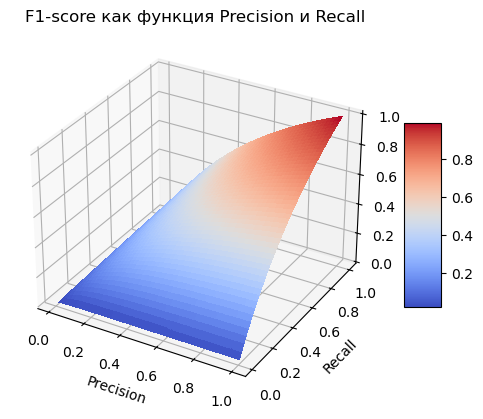

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Создаем сетку значений precision и recall
precision = np.linspace(0.01, 1, 100)
recall = np.linspace(0.01, 1, 100)
P, R = np.meshgrid(precision, recall)

# Вычисляем F1-score
F1 = 2 * (P * R) / (P + R)

# Построение 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(P, R, F1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Настройка осей и меток
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_zlabel('F1-score')
ax.set_title('F1-score как функция Precision и Recall')

# Добавление цветовой шкалы
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()